## Import all required libraries

In [1]:
!pip install sidetable

  Using cached sidetable-0.9.1-py3-none-any.whl (19 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import sidetable as stb

## Import the data to workspace and general overview of dataset

In [3]:
df = pd.read_csv("./Data/Principles of Data Analytics/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Dataset's Overall Statistics

### Dataset's Overall Statistics for Integer

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Dataset's Overall Statistics for Object

In [6]:
df.describe(include='O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


##### Key Points
- from the table above, `the Descriptive Table` for Integer, it shows the `Central Tendency` such as  of each columns
- At the first glance, `cost of product` has mean at around 210 , it probably shows that there is confounder variable that is interfere the relationship between time of arrival and mode of shipment

## Univariate Analysis of Time Arrival

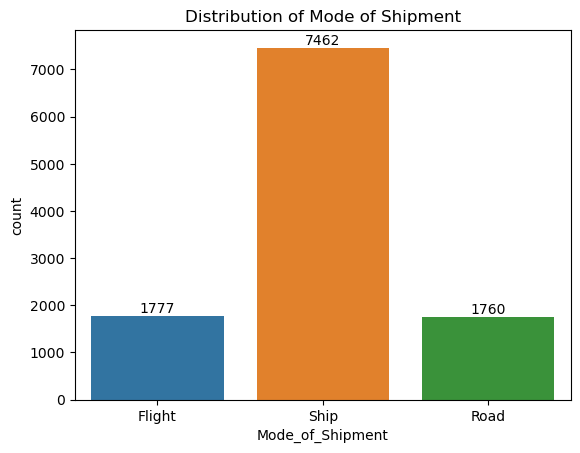

In [7]:
Uni_shipment_bar=sns.countplot(data=df,x='Mode_of_Shipment')
Uni_shipment_bar.bar_label(Uni_shipment_bar.containers[0])
plt.title('Distribution of Mode of Shipment')
plt.show()

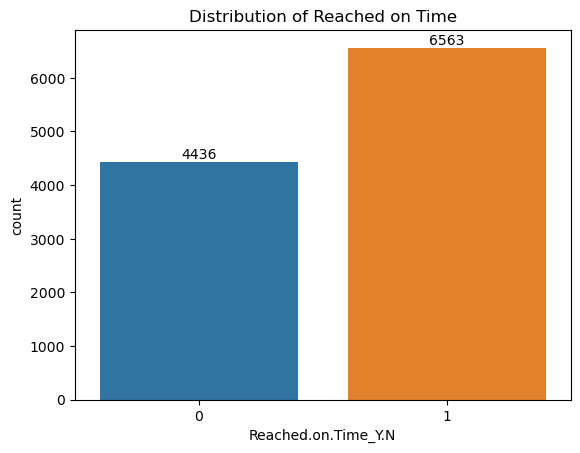

In [8]:
Uni_time_bar=sns.countplot(data=df,x='Reached.on.Time_Y.N')
Uni_time_bar.bar_label(Uni_time_bar.containers[0])
plt.title('Distribution of Reached on Time')
plt.show()

In [9]:
df['Reached.on.Time_Y.N'].value_counts(normalize=True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

## Bivariate analysis (contingency table)

#### Percentage Checking Process

In [10]:
pd.crosstab(index=df['Mode_of_Shipment'],columns=df['Reached.on.Time_Y.N'],normalize='index')*100

Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,39.842431,60.157569
Road,41.193182,58.806818
Ship,40.243902,59.756098


[Text(0.5, 1.0, 'Count plot of number of product reach on time or not')]

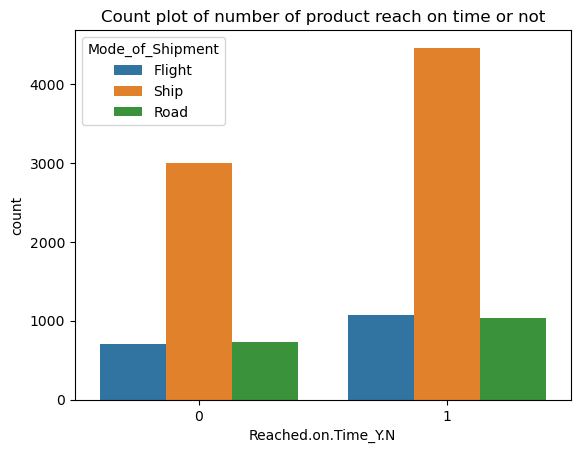

In [11]:
sns.countplot(x=df['Reached.on.Time_Y.N'], hue=df['Mode_of_Shipment']).set(title='Count plot of number of product reach on time or not')

#### Values description
- 1 is showing that the product did not arrive on time
- 0 indiccated the product reached on time

##### Key Points
- for binary columns `central tendency` is described by the proportion of each values and from the measurement that proportion of 1 is 0.59; it means that 1 occurs in the column for around 59% of the time
- it gives an overwiew that nearly 60% of packages did not arrive on time

#### Important Point!
- **However**, to know the central tendency we have to know what kind of distribution they are. Thus, we have to check their distribution

#### Conclusion From Univariate Analysis and Bivariate AnalysisContingency Table
- According to the bar chart, it is evident that `Ship` is the most popular shipment method among the others, and there are more **delayed** orders than on-time orders for all shipment methods. On the other hand, the `flight` method is the **least favorite**, but, it has the **highest percentage** in time arrival for delivering package.

- In addition,**most of products** did not arrive on time with approximately `59%` of them were late
- It is possible there are `confounder` variable that may interfere and effect the relationship the relationship between time of arrival and mode of shipment

In [12]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Distribution Checking for additional statistics check

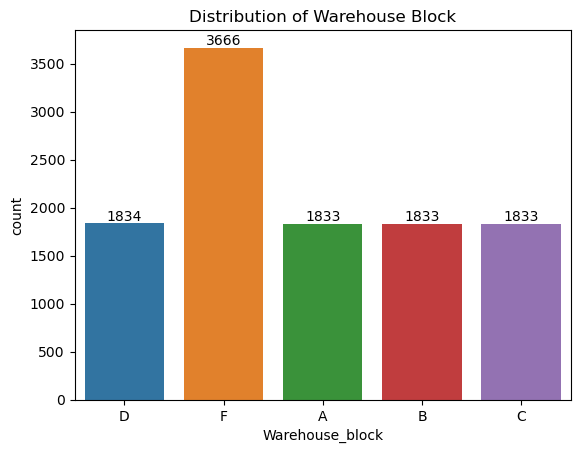

In [13]:
Uni_warehouse_bar=sns.countplot(data=df,x='Warehouse_block')
Uni_warehouse_bar.bar_label(Uni_warehouse_bar.containers[0])
plt.title('Distribution of Warehouse Block')
plt.show()

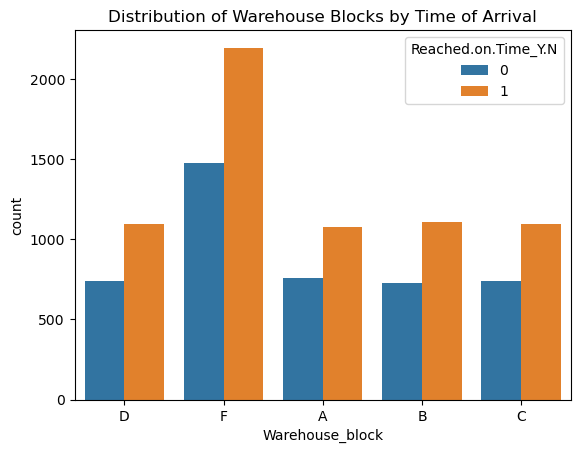

In [14]:
sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N')
plt.title('Distribution of Warehouse Blocks by Time of Arrival')
plt.show()

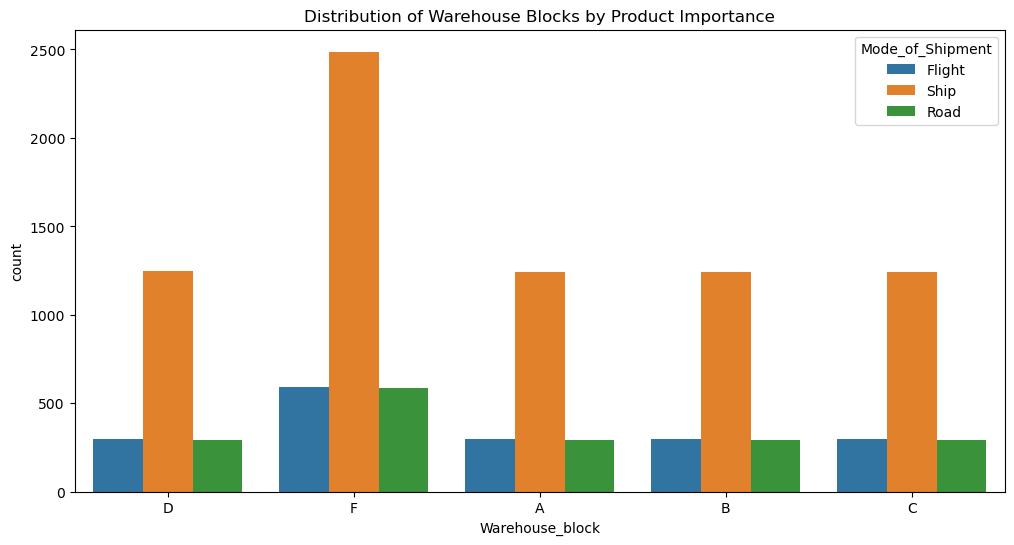

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Warehouse_block', hue='Mode_of_Shipment')
plt.title('Distribution of Warehouse Blocks by Product Importance')
plt.show()

### Key Findings
- From our findings, the confounder variable is warehouse block, because, there is a signifcant gap amongst the warehouse block and `warehouse F` stored 3666 packages.
- `warehouse B` might be the main reason why the packages did not arrive on time. At that place, `shipping` methodology has the highest amount and it is predominantly used by a particular warehouse block.

In [16]:
from scipy.stats import skew


def distribution_checking(data):
    skewness = skew(data)

    if skewness < 0:
        print("The distribution is left-skewed (negatively skewed).")
    elif skewness > 0:
        print("The distribution is right-skewed (positively skewed).")
    else:
        print("The distribution is approximately symmetrical.")

In [17]:
distribution_checking(df['Cost_of_the_Product'])

The distribution is left-skewed (negatively skewed).


In [18]:
import statistics
mode_of_cost = df.groupby('Mode_of_Shipment')['Cost_of_the_Product'].apply(lambda x: x.mode()[0])

print(mode_of_cost)

Mode_of_Shipment
Flight    255
Road      244
Ship      245
Name: Cost_of_the_Product, dtype: int64


### Key points
- with these distribution `mean` is not longer `the central tendency`. for `the left-skewed` distribution the central tendency is **mode**

### Finding
- After checking the distribution and finding the mode, the central tendency is difference. After checking the distribution, the central tendency of the cost of the production for **flight**, **road**, and **ship** is **255**,**244**, and **245** USD respectively.

# Data Preparation

### Checking imported data that have null data or not?

In [19]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Printing the list of all column names and the size of the data

In [20]:
print(f'Dataset contains following columns, which are {list(df.columns)}')
print(f'The size of the dataset is {df.shape}')

Dataset contains following columns, which are ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
The size of the dataset is (10999, 12)


### Extracting unique 'Mode_of_Shipment' information from the dataset

In [21]:
print(df['Mode_of_Shipment'].unique())

['Flight' 'Ship' 'Road']


## Extracting the data of each 'Mode_of_Shipment' into flight, ship and road data and then preview the data

In [22]:
all_flight_data = df[df['Mode_of_Shipment']=='Flight']
all_ship_data = df[df['Mode_of_Shipment']=='Ship']
all_road_data = df[df['Mode_of_Shipment']=='Road']

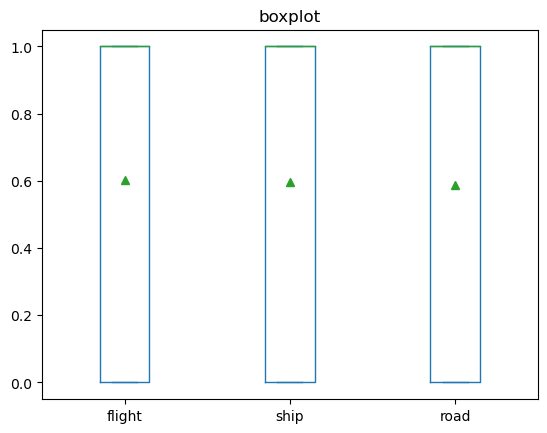

In [23]:
df_mode_shipment = pd.DataFrame({
    "flight": all_flight_data['Reached.on.Time_Y.N'],
    "ship": all_ship_data['Reached.on.Time_Y.N'],
    "road": all_road_data['Reached.on.Time_Y.N']
})
df_mode_shipment
# Create a boxplot
ax = df_mode_shipment[['flight', 'ship', 'road']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

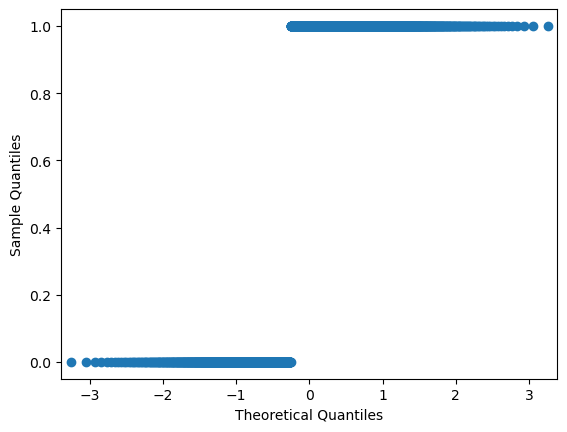

In [24]:
import statsmodels.api as sm

# a = np.random.normal(5, 5, 250)
sm.qqplot(all_flight_data["Reached.on.Time_Y.N"])
plt.show()
# sns.pplot(all_flight_data, x="Reached.on.Time_Y.N", kind='qq')

## From Research Hypothesis Question,  
- Is different type of shipping method directly effect on the time of arrival?  
  
Checking by the data in column named "Reached.on.Time_Y.N", it is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Checking it by Hypothesis testing**  
- Null Hypothesis (H0): The mode of shipment has no effect on the time arrival of the product to the customer  
- Alternative Hypothesis (Ha): the mode of shipment affects the time delivery

### Checking the mean, median, mode and standard deviation of each mode of shipping data

In [25]:
print(all_flight_data['Reached.on.Time_Y.N'].describe())
print(all_ship_data['Reached.on.Time_Y.N'].describe())
print(all_road_data['Reached.on.Time_Y.N'].describe())

count    1777.000000
mean        0.601576
std         0.489711
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    7462.000000
mean        0.597561
std         0.490422
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    1760.000000
mean        0.588068
std         0.492323
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64


***The mean values of all shipment methods being greater than 0.5 indicate that there are more delayed orders than on-time orders. This is determined by the mean values of the 'Reached.on.Time_Y.N' column, where 1 indicates that the product did not reach on time, and 0 indicates it reached on time.***

## Testing by One-way ANOVA to calculate the p-value in order to retain or reject the null hypothesis
Due to datasets were seperated into 3 groups, ANOVA was used to test the hypothesis.

In [26]:
null_hypothesis = "There is no significant difference in the average between 2 types of shipping method."
alternative_hypothesis = "There is a significant difference in the average between 2 types of shipping method."

alpha = 0.05
def print_hypothesis_result(test_name, p_value, alpha):
    print(f"\n{test_name}:")
    print(f"Null Hypothesis: {null_hypothesis}")
    print(f"Alternative Hypothesis: {alternative_hypothesis}")
    print(f"P-Value: {p_value:.4f}")

    if p_value < alpha/2 or p_value>1-alpha/2:
        print("Result: Reject Null Hypothesis")
    else:
        print("Result: Retain Null Hypothesis")

anova_p_value = sts.f_oneway(all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N'], axis=0)[1]
print(f"p-value of one-way ANOVA is: {anova_p_value}")
print_hypothesis_result("ANOVA method", anova_p_value, alpha)


p-value of one-way ANOVA is: 0.6896100162003029

ANOVA method:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.6896
Result: Retain Null Hypothesis


## Another method to test ANOVA using Critical Region Approach
### Degrees of freedom and variations calculation

In [27]:
#Concatenate pandas objects along a particular axis.
dataframe_ob=pd.concat([all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N']], axis=1)
#dof_SSA=c-1
dof_SSA=3-1

Num_Measurement_Group=np.zeros((3,1),dtype=np.int16)

for i in range(3):
    temp=dataframe_ob.values[:,i] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    Num_Measurement_Group[i,0]=len(temp2)

#dof_SSW=n-c
dof_SSW=np.sum(Num_Measurement_Group)-3
print('For among-group variation, degrees of freedom is', dof_SSA )
print('For within-group variation, degrees of freedom is', dof_SSW )

For among-group variation, degrees of freedom is 2
For within-group variation, degrees of freedom is 10996


### Calculate among-group and within-group variations.

In [28]:
#compute grand mean

Group=np.concatenate((all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N']), axis=None)
grand_mean=np.mean(Group)
SSA=0

for j in range(3):
    temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    SSA=SSA+Num_Measurement_Group[j,0]*(np.mean(temp2)-grand_mean)**2 #formula of SSA

SSW=0

for j in range(3):
    for i in range(Num_Measurement_Group[j,0]):
        temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
        temp2=temp[~np.isnan(temp)] #read values that are not nan
        SSW=SSW+(temp2[i]-np.mean(temp2))**2 #formula of SSW

print('Among-group variation SSA is ', SSA)
print('Within-group variation SSW is ', SSW)

Among-group variation SSA is  0.1789084957709865
Within-group variation SSW is  2646.740629643816


### Critical region approach to testing hypothesis

Here's how to do a one-way ANOVA using the critical region approach:
Calculate the C-Value using the F-distribution with the degrees of freedom which we defined above and with 5% alpha as:

sts.f.ppf(0.95, dof_SSA, dof_SSW, loc=0, scale=1).

(SSA/dof_SSA) / (SSW/dof_SSW).

upper critical value is 3.690117256534697
lower critical value is 0.025317866277762575
The test statistic is 0.37164159522546664
The test statistic is not in the critical region, null hypothesis is retained 


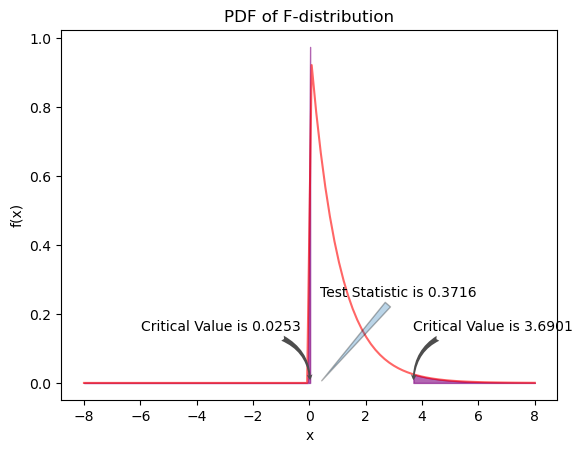

In [29]:
# Critical Value

x = np.linspace(-8, 8, 100)
plt.plot(x, sts.f.pdf(x,dof_SSA, dof_SSW,loc=0, scale=1), 'r-', alpha=0.6)
plt.title('PDF of F-distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_up=sts.f.ppf(0.975, dof_SSA, dof_SSW, loc=0, scale=1)
C_value_low=sts.f.ppf(0.025, dof_SSA, dof_SSW, loc=0, scale=1)
print('upper critical value is', C_value_up)
print('lower critical value is', C_value_low)

x2= np.linspace(C_value_up,8, 100)
plt.fill_between(x2, sts.f.pdf(x2,dof_SSA, dof_SSW,loc=0, scale=1), color='purple',alpha=0.6)
plt.annotate(f'Critical Value is {round(C_value_up,4)}',(C_value_up,0),(C_value_up,0.15),arrowprops=dict(arrowstyle="fancy",
    fc="0.3", ec="none",
    connectionstyle="angle3,angleA=0,angleB=-90"))

x3= np.linspace(-8, C_value_low, 100)
plt.fill_between(x3, sts.f.pdf(x3,dof_SSA, dof_SSW,loc=0, scale=1), color='purple',alpha=0.6)
plt.annotate(f'Critical Value is {round(C_value_low,4)}',(C_value_low,0),(C_value_low-6,0.15),arrowprops=dict(arrowstyle="fancy",
    fc="0.3", ec="none",
    connectionstyle="angle3,angleA=0,angleB=-90"))


# compute test statistic for one-way ANOVA
test_statistic_value=(SSA/dof_SSA) / (SSW/dof_SSW)
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic is {round(test_statistic_value,4)}',(test_statistic_value,0),(test_statistic_value,0.25),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3))
print('The test statistic is not in the critical region, null hypothesis is retained ')

In [30]:
p_value_kruskal = sts.kruskal(all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N'])[1]
print(f"p-value of Kruskal-Wallis test is: {p_value_kruskal}")
print_hypothesis_result("Kruskal-Wallis method", p_value_kruskal, alpha)

p-value of Kruskal-Wallis test is: 0.6895720668678637

Kruskal-Wallis method:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.6896
Result: Retain Null Hypothesis


## Using t-test to compare that there is no significantly difference in population mean between each of mode of shipment.

Due to the distribution of data not align to normal distribution using ANOVA might not be enough, t-test was used to make this hypothesis more solid.

In [31]:
# Hypothesis Testing using t-test

flight_reached_on_time = all_flight_data['Reached.on.Time_Y.N']
ship_reached_on_time = all_ship_data['Reached.on.Time_Y.N']
road_reached_on_time = all_road_data['Reached.on.Time_Y.N']

t_stat_fs, p_value_fs = sts.ttest_ind(flight_reached_on_time, ship_reached_on_time)
t_stat_fr, p_value_fr = sts.ttest_ind(flight_reached_on_time, road_reached_on_time)
t_stat_sr, p_value_sr = sts.ttest_ind(ship_reached_on_time, road_reached_on_time)

print_hypothesis_result("T-test for on time", p_value_fs, alpha)
print_hypothesis_result("T-test for on time", p_value_fr, alpha)
print_hypothesis_result("T-test for on time", p_value_sr, alpha)


T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.7564
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4134
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4655
Result: Retain Null Hypothesis


### Find Critical Region for T-test (Hypothesis Testing)

The lower critical value is -1.9601797081160568
The upper critical value is 1.9601797081160564
The test statistic of flight is 0.4205089150651519
The test statistic of ship is 0.153306286774387
The test statistic of road is -0.7347437597986796
The test statistic is in the critical region, null hypothesis is retained 


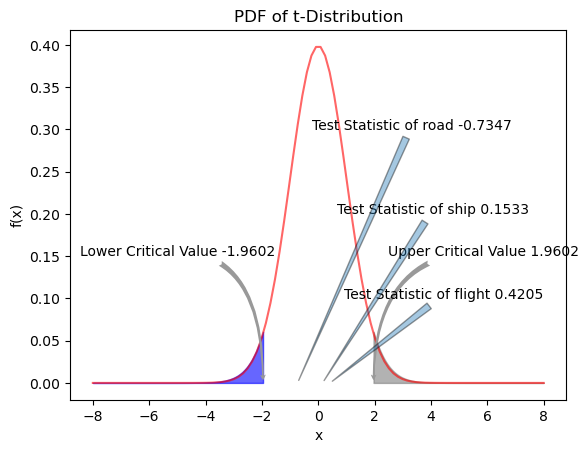

In [32]:
x = np.linspace(-8, 8, 100)
plt.plot(x, sts.t.pdf(x, df['Reached.on.Time_Y.N'].count()-1), 'r-', alpha=0.6) #Generate PDF of t-distribution with 39 degree of freedom
plt.title('PDF of t-Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

# Find Lower Critical Region
C_value_L=sts.t.ppf(0.025, df['Reached.on.Time_Y.N'].count()-1, loc=0, scale=1) # compute critical value by using the inverse function of cdf of t-distribution. Input is 1/2*alpha
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.t.pdf(x2, 39), color='blue',alpha=0.6)
plt.annotate(f'Lower Critical Value {round(C_value_L,4)}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation

# Find Upper Critical Region
C_value_U=sts.t.ppf(0.975, df['Reached.on.Time_Y.N'].count()-1, loc=0, scale=1) # compute critical value by using the inverse function of cdf of t-distribution. Input is 1-1/2*alpha
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100) #Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.t.pdf(x3, 39), color='grey',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x2, 39)
plt.annotate(f'Upper Critical Value {round(C_value_U,4)}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation

# Test Statistic
overall_mean = df['Reached.on.Time_Y.N'].mean()
test_statistic_value_f = ((all_flight_data['Reached.on.Time_Y.N'].mean()-overall_mean)/all_flight_data['Reached.on.Time_Y.N'].std())*np.sqrt(all_flight_data['Reached.on.Time_Y.N'].count())
test_statistic_value_s = ((all_ship_data['Reached.on.Time_Y.N'].mean()-overall_mean)/all_ship_data['Reached.on.Time_Y.N'].std())*np.sqrt(all_ship_data['Reached.on.Time_Y.N'].count())
test_statistic_value_r = ((all_road_data['Reached.on.Time_Y.N'].mean()-overall_mean)/all_road_data['Reached.on.Time_Y.N'].std())*np.sqrt(all_road_data['Reached.on.Time_Y.N'].count())
print('The test statistic of flight is', test_statistic_value_f)
print('The test statistic of ship is', test_statistic_value_s)
print('The test statistic of road is', test_statistic_value_r)
plt.annotate(f'Test Statistic of flight {round(test_statistic_value_f,4)}',(test_statistic_value_f,0),(test_statistic_value_f+0.5,0.10),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
plt.annotate(f'Test Statistic of ship {round(test_statistic_value_s,4)}',(test_statistic_value_s,0),(test_statistic_value_s+0.5,0.20),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
plt.annotate(f'Test Statistic of road {round(test_statistic_value_r,4)}',(test_statistic_value_r,0),(test_statistic_value_r+0.5,0.30),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
print('The test statistic is in the critical region, null hypothesis is retained ')

## Find the correlation between shipment method and reach on time

In [33]:
new_df = df[['Mode_of_Shipment','Reached.on.Time_Y.N']]
new_df.loc[new_df['Mode_of_Shipment'] == 'Flight', 'Shipment_Mode_Number'] = 1
new_df.loc[new_df['Mode_of_Shipment'] == 'Ship', 'Shipment_Mode_Number'] = 2
new_df.loc[new_df['Mode_of_Shipment'] == 'Road', 'Shipment_Mode_Number'] = 3
new_df.head()

/tmp/ipykernel_158/1323423086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['Mode_of_Shipment'] == 'Flight', 'Shipment_Mode_Number'] = 1


,Mode_of_Shipment,Reached.on.Time_Y.N,Shipment_Mode_Number
0,Flight,1,1.0
1,Flight,1,1.0
2,Flight,1,1.0
3,Flight,1,1.0
4,Flight,1,1.0


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


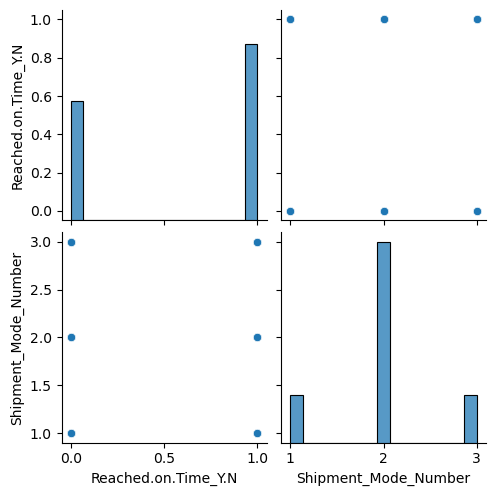

In [34]:
sns.pairplot(new_df[['Reached.on.Time_Y.N','Shipment_Mode_Number']])

                      Reached.on.Time_Y.N  Shipment_Mode_Number
Reached.on.Time_Y.N              1.000000             -0.007797
Shipment_Mode_Number            -0.007797              1.000000


<Axes: >

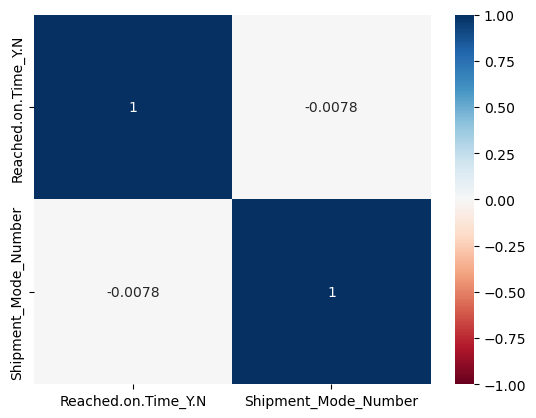

In [35]:
corr_matrix = new_df[['Reached.on.Time_Y.N','Shipment_Mode_Number']].corr(method="pearson")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)